# Extracting embbeded vectors of pdbx_details

In [2]:
import pandas as pd

In [4]:
path = '/home/ofir/ofir_code/crystoper/data/pdb_data/processed_data.csv'
df = pd.read_csv(path)

<Axes: >

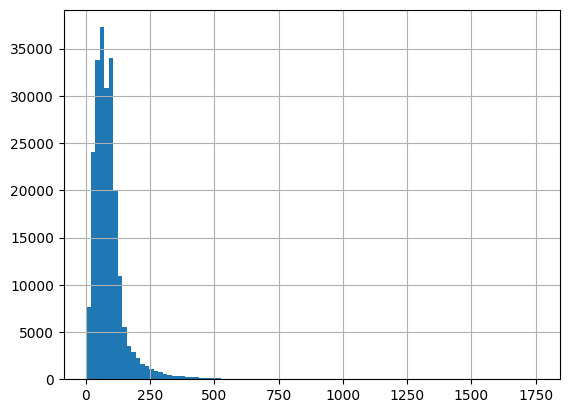

In [9]:
df.pdbx_details.str.len().hist(bins=100)